In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS
from astropy.visualization import simple_norm
from astropy.wcs import WCS
import numpy as np
import math
from rich import print

# Single data

In [2]:
df = pd.read_csv('./data/FLambdaSingleObj.csv', comment='#')
df

TILE_ID  FILTER_ID  FLAGS  NUMBER    hpix11  ALPHA_J2000  DELTA_J2000  \
0          2351          1     16       3  11699642   215.231831    52.898138   
1          2351          1     16       4  11700101   214.894545    53.097003   
2          2351          1     16       6  11699994   215.091284    52.979154   
3          2351          1     24       8  11699642   215.207562    52.909093   
4          2351          1      0       9  11702880   215.490903    53.493301   
...         ...        ...    ...     ...       ...          ...          ...   
604565     2242         60      0    6306  11699858   214.515393    52.745339   
604566     2242         60      0    6323  11699730   214.812878    52.561756   
604567     2242         60      0    6324  11699760   214.689575    52.637103   
604568     2242         60      0    6327  11699736   214.757007    52.595075   
604569     2242         60      0    6329  11699002   214.250261    52.317629   

           X_IMAGE      Y_IMAGE  FWHM_WORLD  ...  FLUX_RELERR_APER_4_0  \
0       6426.92090    43.418453    0.000227  ...              0.029144   
1       1917.17383    30.140921    0.000252  ...              0.350342   
2       4567.04932    13.135840    0.000216  ...              0.710449   
3       6139.49854     3.584631    0.000140  ...              0.048309   
4       1521.25464  8473.734380    0.000346  ...              6.015625   
...            ...          ...         ...  ...                   ...   
604565  3302.20801  8477.273440    0.000420  ...              0.074646   
604566  7387.45459  8452.238280    0.000319  ...              0.083374   
604567  5701.51709  8451.205080    0.000236  ...              0.305664   
604568  6632.60107  8442.046880    0.000217  ...              0.437012   
604569  6278.07764  1867.834720    0.000321  ...              0.148315   

        FLUX_RELERR_APER_6_0  KRON_RADIUS  PETRO_RADIUS  RELERRA_WORLD  \
0                   0.041809     3.500000      3.500000       0.029312   
1                   0.546875     6.789062     10.562500       0.205811   
2                   4.000000     7.164062     10.562500       0.244019   
3                   0.064087     3.500000      3.960938       0.046692   
4                  13.679688     5.953125      7.921875       0.204712   
...                      ...          ...           ...            ...   
604565              0.077026     6.707031      9.898438       0.132812   
604566              0.140381     5.042969      9.242188       0.075012   
604567              0.474609     7.414062      8.578125       0.162354   
604568              2.630859     8.289062     10.562500       0.178101   
604569              0.175537     7.437500     10.562500       0.141235   

        RELERRB_WORLD  ERRTHETA_J2000  CLASS_STAR  NORM_WMAP_VAL  MASK_FLAGS  
0            0.030899        51.71875       0.743       0.623205           1  
1            0.239502       -79.43750       0.489       0.404747           1  
2            0.287842       -55.81250       0.379       0.414309           1  
3            0.047272       -57.90625       0.840       0.411111           1  
4            0.215576       -37.09375       0.470       0.459447           3  
...               ...             ...         ...            ...         ...  
604565       0.145264        84.37500       0.521       0.443973           1  
604566       0.083374        57.12500       0.269       0.901353           1  
604567       0.186035        47.18750       0.509       0.932655           1  
604568       0.192505        76.62500       0.525       0.921313           0  
604569       0.146362        58.62500       0.564       0.943124           0  

[604570 rows x 48 columns]

In [3]:
df.value_counts('FILTER_ID')

FILTER_ID
59    24614
60    21503
30    20959
31    20626
35    16658
28    15455
36    15409
50    14996
32    14908
29    14224
38    13869
39    13710
34    11974
17    11943
10    11454
24    11060
43    10928
58    10830
51    10631
33    10590
46    10587
25    10530
56    10369
41    10003
47     9962
45     9681
22     9555
44     9283
19     9091
14     9063
27     9009
21     8990
42     8882
49     8872
40     8801
37     8734
15     8677
18     8596
48     8595
55     8555
26     8325
3      8267
11     8162
52     7975
54     7874
7      7429
8      7136
53     6934
12     6709
23     6606
20     6483
4      5860
13     5703
16     5512
1      5015
2      4507
9      4351
5      4135
6      3896
57     1515
Name: count, dtype: int64

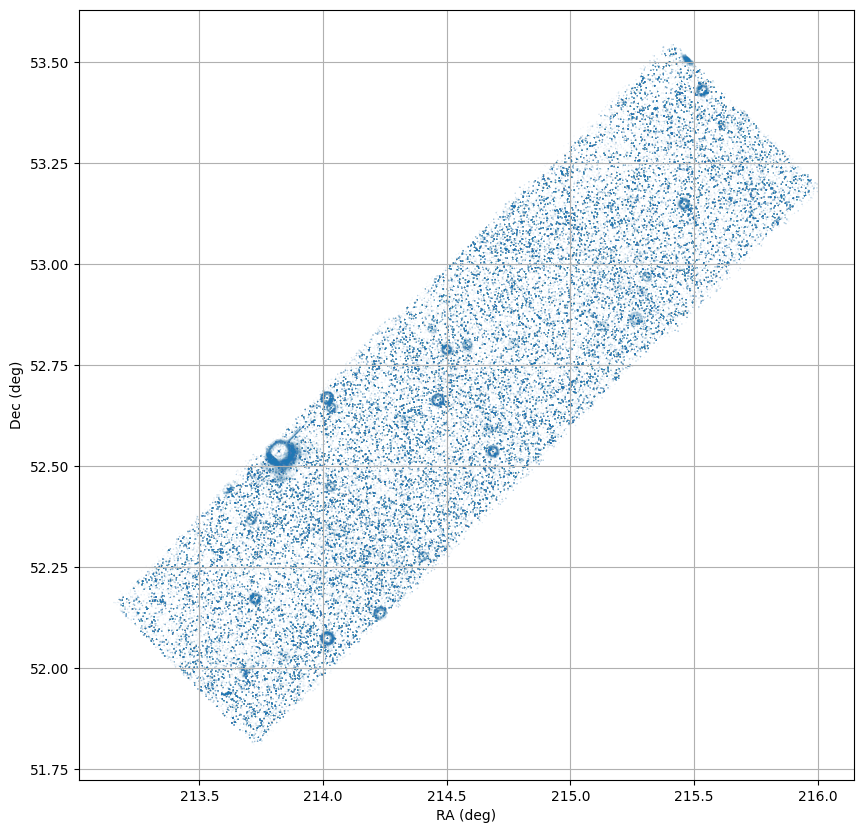

In [4]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df['ALPHA_J2000'], y=df['DELTA_J2000'], s=1, 
            alpha=0.05, edgecolors='none')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.grid()
plt.show()

# Dula data

In [5]:
df_dual = pd.read_csv('./data/FLambdaDualObj.csv', comment='#')
df_dual

TILE_ID  NUMBER  ALPHA_J2000  DELTA_J2000    hpix11     X_IMAGE  \
0         2406       2   214.881557    53.103476  11700101  1756.88098   
1         2406       4   214.861588    53.115839  11700103  1483.69287   
2         2406       9   215.061658    52.998000  11699994  4155.54639   
3         2406      10   215.180854    52.927186  11699984  5755.89111   
4         2406      11   214.907509    53.089148  11700101  2092.67017   
...        ...     ...          ...          ...       ...         ...   
64288     2243   15940   215.064895    52.812546  11699797  6312.52832   
64289     2243   15941   214.688544    53.040802  11699934  1201.92981   
64290     2243   15942   215.186475    52.737363  11699447  7982.65723   
64291     2243   15943   215.084326    52.799349  11699797  6592.61572   
64292     2243   15944   215.068525    52.809148  11699797  6375.31055   

           Y_IMAGE     R_EFF  FWHM_WORLD   A_WORLD  ...  \
0        16.847881  4.717021    0.000920  0.000203  ...   
1        23.799297  2.087801    0.000216  0.000089  ...   
2        27.424644  2.750906    0.000281  0.000112  ...   
3        28.008156  3.174753    0.000259  0.000118  ...   
4        27.677053  6.961071    0.000425  0.000076  ...   
...            ...       ...         ...       ...  ...   
64288  5494.858400  5.580144    0.000434  0.000208  ...   
64289  5523.615230  5.165153    0.000383  0.000080  ...   
64290  5477.959470  2.420266    0.000250  0.000088  ...   
64291  5478.614750  2.749503    0.000376  0.000099  ...   
64292  5481.346680  2.557108    0.000504  0.000099  ...   

                                                   FLAGS  \
0      17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 1...   
1      16 16 16 17 17 17 17 16 16 16 17 17 17 17 16 1...   
2      16 16 16 17 17 17 17 16 16 16 17 17 17 17 16 1...   
3      16 16 16 17 17 17 17 17 16 16 17 17 17 17 17 1...   
4      18 18 18 19 19 19 19 18 18 18 19 19 19 19 18 1...   
...                                                  ...   
64288  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 ...   
64289  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64290  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64291  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64292  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           NORM_WMAP_VAL  \
0      0.398938924 0.671059191 0.671870828 0.0 0.0 0....   
1      0.20837152 0.89839673 0.681177855 0.0 0.0 0.41...   
2      0.217361659 0.913546681 0.701026499 0.0 0.0 0....   
3      0.426156312 0.916839361 0.186319813 0.0 0.0 0....   
4      0.399055988 0.655363321 0.687582672 0.0 0.0 0....   
...                                                  ...   
64288  0.956941068 0.973625004 0.976183474 0.98467809...   
64289  0.947082579 0.965922475 0.944739759 0.96594297...   
64290  0.923828781 0.937540472 0.942529678 0.95318043...   
64291  0.967528522 0.97575736 0.973541498 0.978428304...   
64292  0.960996389 0.972236931 0.977609754 0.99181813...   

                                              MASK_FLAGS  \
0      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
1      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
2      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
3      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
4      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
...                                                  ...   
64288  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64289  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64290  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64291  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64292  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           SINGLE_DETECT  \
0      0 0 0 0 0 0 0 0 0 9 0 0 0 0 9 0 11 0 0 0 0 8 8...   
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
2      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
3     

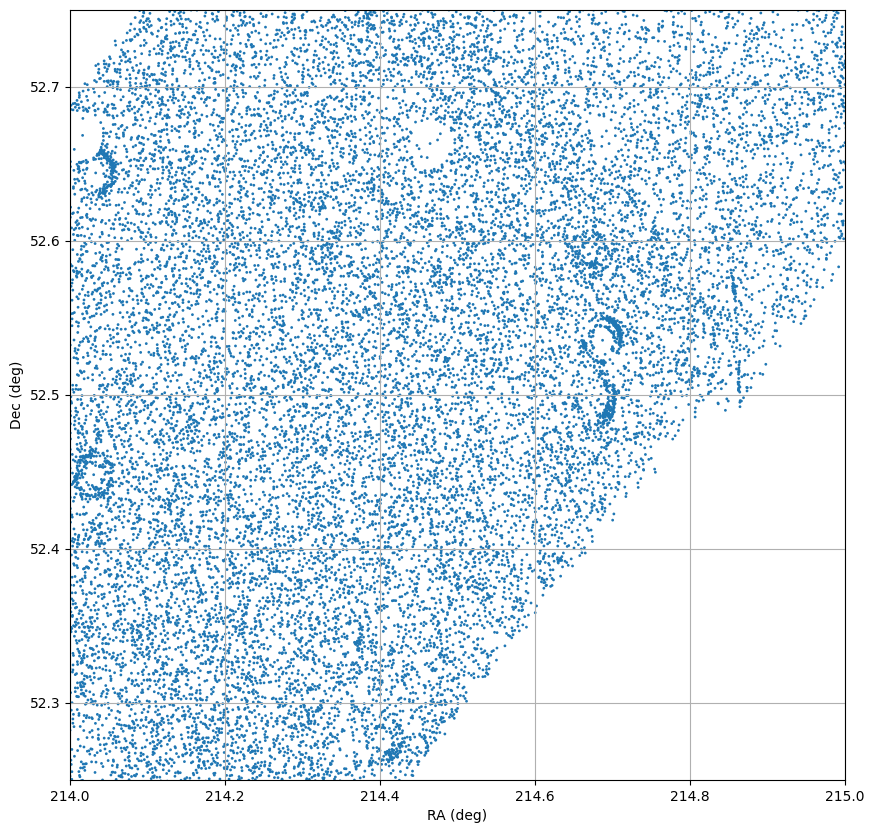

In [6]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_dual['ALPHA_J2000'], y=df_dual['DELTA_J2000'], s=4, 
            alpha=1, edgecolors='none')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.xlim(214, 215)
plt.ylim(52.25, 52.75)
plt.grid()
plt.show()

# SDSS data

In [7]:
df_dual = pd.read_csv('./data/FLambdaDualObj.csv', comment='#')
df_dual

TILE_ID  NUMBER  ALPHA_J2000  DELTA_J2000    hpix11     X_IMAGE  \
0         2406       2   214.881557    53.103476  11700101  1756.88098   
1         2406       4   214.861588    53.115839  11700103  1483.69287   
2         2406       9   215.061658    52.998000  11699994  4155.54639   
3         2406      10   215.180854    52.927186  11699984  5755.89111   
4         2406      11   214.907509    53.089148  11700101  2092.67017   
...        ...     ...          ...          ...       ...         ...   
64288     2243   15940   215.064895    52.812546  11699797  6312.52832   
64289     2243   15941   214.688544    53.040802  11699934  1201.92981   
64290     2243   15942   215.186475    52.737363  11699447  7982.65723   
64291     2243   15943   215.084326    52.799349  11699797  6592.61572   
64292     2243   15944   215.068525    52.809148  11699797  6375.31055   

           Y_IMAGE     R_EFF  FWHM_WORLD   A_WORLD  ...  \
0        16.847881  4.717021    0.000920  0.000203  ...   
1        23.799297  2.087801    0.000216  0.000089  ...   
2        27.424644  2.750906    0.000281  0.000112  ...   
3        28.008156  3.174753    0.000259  0.000118  ...   
4        27.677053  6.961071    0.000425  0.000076  ...   
...            ...       ...         ...       ...  ...   
64288  5494.858400  5.580144    0.000434  0.000208  ...   
64289  5523.615230  5.165153    0.000383  0.000080  ...   
64290  5477.959470  2.420266    0.000250  0.000088  ...   
64291  5478.614750  2.749503    0.000376  0.000099  ...   
64292  5481.346680  2.557108    0.000504  0.000099  ...   

                                                   FLAGS  \
0      17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 1...   
1      16 16 16 17 17 17 17 16 16 16 17 17 17 17 16 1...   
2      16 16 16 17 17 17 17 16 16 16 17 17 17 17 16 1...   
3      16 16 16 17 17 17 17 17 16 16 17 17 17 17 17 1...   
4      18 18 18 19 19 19 19 18 18 18 19 19 19 19 18 1...   
...                                                  ...   
64288  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 ...   
64289  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64290  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64291  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64292  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           NORM_WMAP_VAL  \
0      0.398938924 0.671059191 0.671870828 0.0 0.0 0....   
1      0.20837152 0.89839673 0.681177855 0.0 0.0 0.41...   
2      0.217361659 0.913546681 0.701026499 0.0 0.0 0....   
3      0.426156312 0.916839361 0.186319813 0.0 0.0 0....   
4      0.399055988 0.655363321 0.687582672 0.0 0.0 0....   
...                                                  ...   
64288  0.956941068 0.973625004 0.976183474 0.98467809...   
64289  0.947082579 0.965922475 0.944739759 0.96594297...   
64290  0.923828781 0.937540472 0.942529678 0.95318043...   
64291  0.967528522 0.97575736 0.973541498 0.978428304...   
64292  0.960996389 0.972236931 0.977609754 0.99181813...   

                                              MASK_FLAGS  \
0      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
1      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
2      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
3      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
4      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
...                                                  ...   
64288  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64289  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64290  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64291  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64292  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           SINGLE_DETECT  \
0      0 0 0 0 0 0 0 0 0 9 0 0 0 0 9 0 11 0 0 0 0 8 8...   
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
2      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
3     

In [8]:
ra_c = (df_dual['ALPHA_J2000'].max() + df_dual['ALPHA_J2000'].min()) / 2
dec_c = (df_dual['DELTA_J2000'].max() + df_dual['DELTA_J2000'].min()) / 2
ra_c, dec_c

(np.float64(214.575034115), np.float64(52.67628441135))

In [9]:
ra_delta = df_dual['ALPHA_J2000'].max() - df_dual['ALPHA_J2000'].min()
dec_delta = df_dual['DELTA_J2000'].max() - df_dual['DELTA_J2000'].min()
ra_delta, dec_delta

(np.float64(2.827816296000009), np.float64(1.7266420528999973))

In [10]:
rad = 3 * u.arcmin
rad

<Quantity 3. arcmin>

In [11]:
coords = SkyCoord(ra=df_dual['ALPHA_J2000'], dec=df_dual['DELTA_J2000'], unit=(u.deg, u.deg), frame='icrs')
coords

<SkyCoord (ICRS): (ra, dec) in deg
    [(214.88155692, 53.10347622), (214.86158834, 53.11583931),
     (215.06165824, 52.99799953), ..., (215.18647509, 52.73736272),
     (215.08432624, 52.79934893), (215.06852464, 52.80914842)]>

In [12]:
center = SkyCoord(ra=ra_c, dec=dec_c, unit=(u.deg, u.deg), frame='icrs')
xid = SDSS.query_region(center, radius= rad)
xid

<Table length=266>
       ra              dec               objid         run  rerun camcol field
    float64          float64             uint64       int64 int64 int64  int64
---------------- ---------------- ------------------- ----- ----- ------ -----
214.502951831203 52.6686038247542 1237661385994732006  3705   301      1   111
214.493511183676 52.6724849284308 1237661385994731996  3705   301      1   111
214.527681669406 52.6442452757406 1237661385994731577  3705   301      1   111
214.525982484492 52.6445006066207 1237661416065663439  3712   301      1   205
214.525982484492 52.6445006066207 1237661416065663440  3712   301      1   205
214.526125208059 52.6444875657194 1237661385994731575  3705   301      1   111
 214.51531126067 52.6522476690934 1237661385994732253  3705   301      1   111
214.519435957081 52.6509344845996 1237661385994732256  3705   301      1   111
214.518112483302 52.6416751488623 1237661385994731574  3705   301      1   111
             ...              ...                 ...   ...   ...    ...   ...
214.620316892585 52.7180026470424 1237661385994732290  3705   301      1   111
214.622730945188 52.7150681205848 1237661385994732475  3705   301      1   111
214.577233566093 52.7160248899293 1237661385994732031  3705   301      1   111
214.564289595996 52.7137220127019 1237661385994732027  3705   301      1   111
214.572511689239  52.715200768955 1237661385994732458  3705   301      1   111
 214.55985916205 52.7225698586912 1237661385994731829  3705   301      1   111
 214.57605926435 52.7252703851718 1237661385994731685  3705   301      1   111
214.576052797583 52.7252723779189 1237661385994731684  3705   301      1   111
214.578160263384 52.7227990852712 1237661385994732459  3705   301      1   111
 214.56614901299 52.7225293148845 1237661385994731831  3705   301      1   111

In [13]:
df_sdss = xid.to_pandas()
df_sdss

ra        dec                objid   run  rerun  camcol  field
0    214.502952  52.668604  1237661385994732006  3705    301       1    111
1    214.493511  52.672485  1237661385994731996  3705    301       1    111
2    214.527682  52.644245  1237661385994731577  3705    301       1    111
3    214.525982  52.644501  1237661416065663439  3712    301       1    205
4    214.525982  52.644501  1237661416065663440  3712    301       1    205
..          ...        ...                  ...   ...    ...     ...    ...
261  214.559859  52.722570  1237661385994731829  3705    301       1    111
262  214.576059  52.725270  1237661385994731685  3705    301       1    111
263  214.576053  52.725272  1237661385994731684  3705    301       1    111
264  214.578160  52.722799  1237661385994732459  3705    301       1    111
265  214.566149  52.722529  1237661385994731831  3705    301       1    111

[266 rows x 7 columns]

In [14]:
df_runs = df_sdss.value_counts(['run', 'camcol', 'field'])
df_runs

run   camcol  field
3705  1       111      251
3712  1       205       15
Name: count, dtype: int64

In [15]:
df_runs.index[0]

(np.int64(3705), np.int64(1), np.int64(111))

In [16]:
run, camcol, field = df_runs.index[0]
imgs = SDSS.get_images(run=run, camcol=camcol, field=field)

In [17]:
w = WCS(imgs[0][0].header)
w

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : np.float64(214.61319279) np.float64(52.7280517703) 
CRPIX : np.float64(1025.0) np.float64(745.0) 
CD1_1 CD1_2  : np.float64(4.58331020418e-05) np.float64(9.998384818e-05) 
CD2_1 CD2_2  : np.float64(9.99538649688e-05) np.float64(-4.58470133214e-05) 
NAXIS : 2048  1489

In [18]:
data = imgs[0][0].data

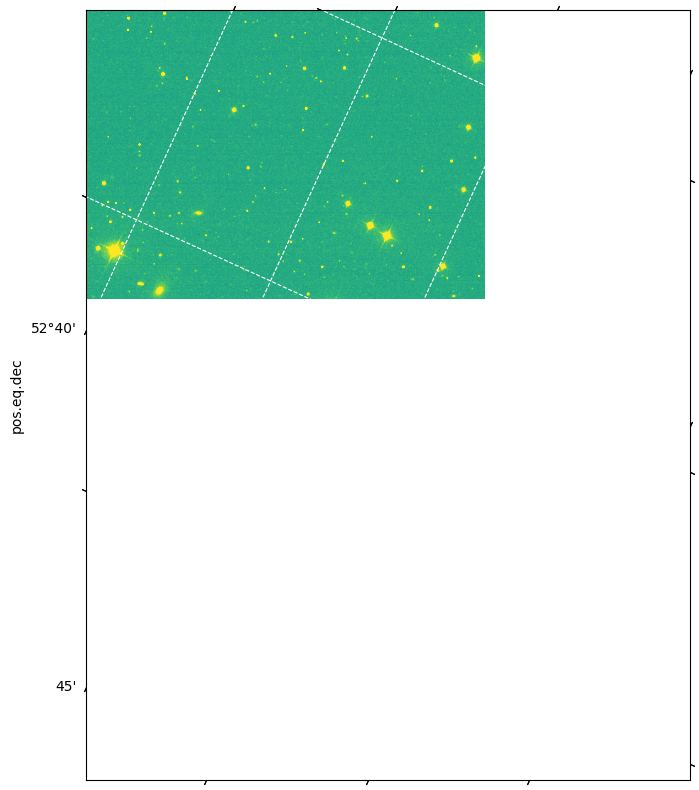

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=w) 
norm = simple_norm(data, 'sqrt', percent=99)
plt.imshow(imgs[0][0].data, norm=norm, origin='lower')
plt.grid(color='white', ls='dashed')
plt.scatter(214.256748507,  53.0595079902, transform=ax.get_transform('icrs'), s=100, edgecolor='white', facecolor='none')
plt.show()

## SDSS SQL query

In [20]:
df_dual = pd.read_csv('./data/FLambdaDualObj.csv', comment='#')
df_dual

TILE_ID  NUMBER  ALPHA_J2000  DELTA_J2000    hpix11     X_IMAGE  \
0         2406       2   214.881557    53.103476  11700101  1756.88098   
1         2406       4   214.861588    53.115839  11700103  1483.69287   
2         2406       9   215.061658    52.998000  11699994  4155.54639   
3         2406      10   215.180854    52.927186  11699984  5755.89111   
4         2406      11   214.907509    53.089148  11700101  2092.67017   
...        ...     ...          ...          ...       ...         ...   
64288     2243   15940   215.064895    52.812546  11699797  6312.52832   
64289     2243   15941   214.688544    53.040802  11699934  1201.92981   
64290     2243   15942   215.186475    52.737363  11699447  7982.65723   
64291     2243   15943   215.084326    52.799349  11699797  6592.61572   
64292     2243   15944   215.068525    52.809148  11699797  6375.31055   

           Y_IMAGE     R_EFF  FWHM_WORLD   A_WORLD  ...  \
0        16.847881  4.717021    0.000920  0.000203  ...   
1        23.799297  2.087801    0.000216  0.000089  ...   
2        27.424644  2.750906    0.000281  0.000112  ...   
3        28.008156  3.174753    0.000259  0.000118  ...   
4        27.677053  6.961071    0.000425  0.000076  ...   
...            ...       ...         ...       ...  ...   
64288  5494.858400  5.580144    0.000434  0.000208  ...   
64289  5523.615230  5.165153    0.000383  0.000080  ...   
64290  5477.959470  2.420266    0.000250  0.000088  ...   
64291  5478.614750  2.749503    0.000376  0.000099  ...   
64292  5481.346680  2.557108    0.000504  0.000099  ...   

                                                   FLAGS  \
0      17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 1...   
1      16 16 16 17 17 17 17 16 16 16 17 17 17 17 16 1...   
2      16 16 16 17 17 17 17 16 16 16 17 17 17 17 16 1...   
3      16 16 16 17 17 17 17 17 16 16 17 17 17 17 17 1...   
4      18 18 18 19 19 19 19 18 18 18 19 19 19 19 18 1...   
...                                                  ...   
64288  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 ...   
64289  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64290  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64291  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64292  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           NORM_WMAP_VAL  \
0      0.398938924 0.671059191 0.671870828 0.0 0.0 0....   
1      0.20837152 0.89839673 0.681177855 0.0 0.0 0.41...   
2      0.217361659 0.913546681 0.701026499 0.0 0.0 0....   
3      0.426156312 0.916839361 0.186319813 0.0 0.0 0....   
4      0.399055988 0.655363321 0.687582672 0.0 0.0 0....   
...                                                  ...   
64288  0.956941068 0.973625004 0.976183474 0.98467809...   
64289  0.947082579 0.965922475 0.944739759 0.96594297...   
64290  0.923828781 0.937540472 0.942529678 0.95318043...   
64291  0.967528522 0.97575736 0.973541498 0.978428304...   
64292  0.960996389 0.972236931 0.977609754 0.99181813...   

                                              MASK_FLAGS  \
0      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
1      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
2      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
3      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
4      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
...                                                  ...   
64288  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64289  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64290  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64291  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64292  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           SINGLE_DETECT  \
0      0 0 0 0 0 0 0 0 0 9 0 0 0 0 9 0 11 0 0 0 0 8 8...   
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
2      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
3     

In [21]:
query = f"""
SELECT 
   p.objid, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z
FROM PhotoPrimary AS p 
WHERE p.ra BETWEEN {df_dual['ALPHA_J2000'].min()} AND {df_dual['ALPHA_J2000'].max()} 
    AND p.dec BETWEEN {df_dual['DELTA_J2000'].min()} AND {df_dual['DELTA_J2000'].max()} 
    AND p.r BETWEEN 14 AND 22.0
"""
query

'\nSELECT \n   p.objid, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z \nFROM PhotoPrimary AS p \nWHERE p.ra BETWEEN 213.161125967 AND 215.988942263 \n    AND p.dec BETWEEN 51.8129633849 AND 53.5396054378 \n    AND p.r BETWEEN 14 AND 22.0\n'

In [22]:
res = SDSS.query_sql(query)
df_sdss = res.to_pandas()
df_sdss

objid          ra        dec         u         g  \
0      1237659120932749886  213.173756  52.666004  22.98309  22.14046   
1      1237659120396009838  213.173841  52.019928  26.12162  22.51976   
2      1237661416602075953  213.173922  53.393716  23.23977  23.10536   
3      1237659133281239748  213.174025  52.260519  23.65185  23.73940   
4      1237661416065270064  213.174047  52.927501  21.41966  20.70610   
...                    ...         ...        ...       ...       ...   
35025  1237661387068670743  215.986377  53.343198  25.11889  23.62961   
35026  1237659120933601899  215.986383  51.871457  26.47417  24.17997   
35027  1237661416066122002  215.986448  52.198397  21.14041  18.86676   
35028  1237661385995125023  215.986535  52.220032  21.64007  21.72650   
35029  1237661416602861697  215.986620  52.670663  24.64980  21.46678   

              r         i         z  
0      21.28821  20.84168  20.92998  
1      21.36014  21.19344  20.89348  
2      21.35006  20.78743  20.48298  
3      21.83022  22.02349  21.94809  
4      19.79470  19.49070  19.14903  
...         ...       ...       ...  
35025  21.62509  21.09358  20.53301  
35026  21.66444  20.79322  19.83579  
35027  17.75906  17.30171  17.02680  
35028  21.28793  21.11779  21.23082  
35029  20.28998  18.47130  22.82771  

[35030 rows x 8 columns]

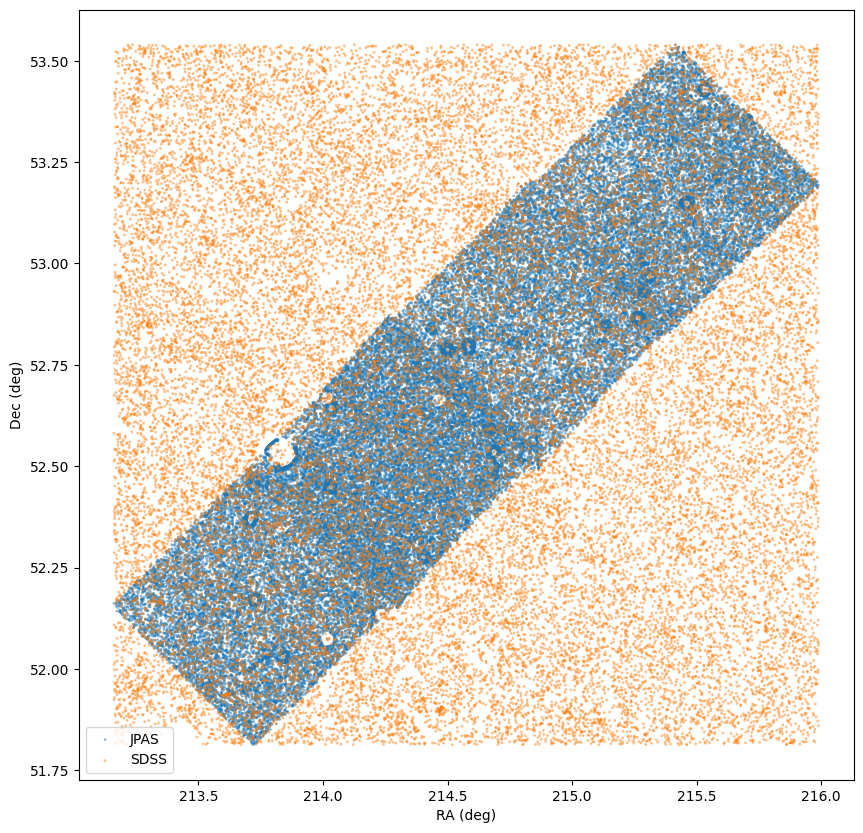

In [23]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_dual['ALPHA_J2000'], y=df_dual['DELTA_J2000'], s=4, 
            edgecolors='none', alpha=0.5, label='JPAS')
plt.scatter(x=df_sdss['ra'], y=df_sdss['dec'], s=4,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.legend()
plt.show()

In [24]:
jpcas_coords = SkyCoord(ra=df_dual['ALPHA_J2000'], dec=df_dual['DELTA_J2000'], unit=(u.deg, u.deg), frame='icrs')
sdss_coords = SkyCoord(ra=df_sdss['ra'], dec=df_sdss['dec'], unit=(u.deg, u.deg), frame='icrs')
jpcas_coords[:10]

<SkyCoord (ICRS): (ra, dec) in deg
    [(214.88155692, 53.10347622), (214.86158834, 53.11583931),
     (215.06165824, 52.99799953), (215.18085383, 52.92718615),
     (214.90750932, 53.08914797), (215.02297422, 53.02092993),
     (214.95391176, 53.06188013), (214.87433046, 53.10899829),
     (215.12066902, 52.96337478), (215.30519592, 52.85336498)]>

In [25]:
idx, sep2d, _ =  jpcas_coords.match_to_catalog_sky(sdss_coords)

In [26]:
len(set(idx))

11701

In [27]:
df_sdss = df_sdss.loc[idx]
df_sdss

objid          ra        dec         u         g  \
21888  1237661386531602598  214.881002  53.103171  21.01314  18.44333   
21682  1237661386531602954  214.849506  53.116429  24.67554  22.26626   
24453  1237661386531668421  215.063779  53.011360  21.86699  21.48073   
25843  1237661386531733887  215.181673  52.928789  22.12696  22.32034   
22525  1237661386531602453  214.909839  53.086063  16.56582  15.16612   
...                    ...         ...        ...       ...       ...   
24459  1237661416602665327  215.064293  52.811605  22.55150  21.68178   
19403  1237661416602534359  214.681031  53.037238  24.03888  22.65613   
25655  1237661416602665245  215.186484  52.737385  25.21909  21.39892   
24492  1237661416602665744  215.087082  52.796653  24.53555  23.26519   
24459  1237661416602665327  215.064293  52.811605  22.55150  21.68178   

              r         i         z  
21888  17.18055  16.68684  16.43361  
21682  20.84376  20.35080  20.02091  
24453  20.64998  19.72184  19.44651  
25843  21.86063  21.53305  20.56747  
22525  15.85857  14.97295  14.29874  
...         ...       ...       ...  
24459  20.23207  19.54993  19.19487  
19403  21.39801  20.57948  20.18521  
25655  20.67319  20.46666  20.08990  
24492  21.56516  21.44293  21.29300  
24459  20.23207  19.54993  19.19487  

[64293 rows x 8 columns]

In [28]:
# max_sep = 1 * u.arcsec
# cond = sep2d < max_sep
# jpcas_matched = jpcas_coords[cond]
# sdss_coords_matched = sdss_coords[idx[cond]]

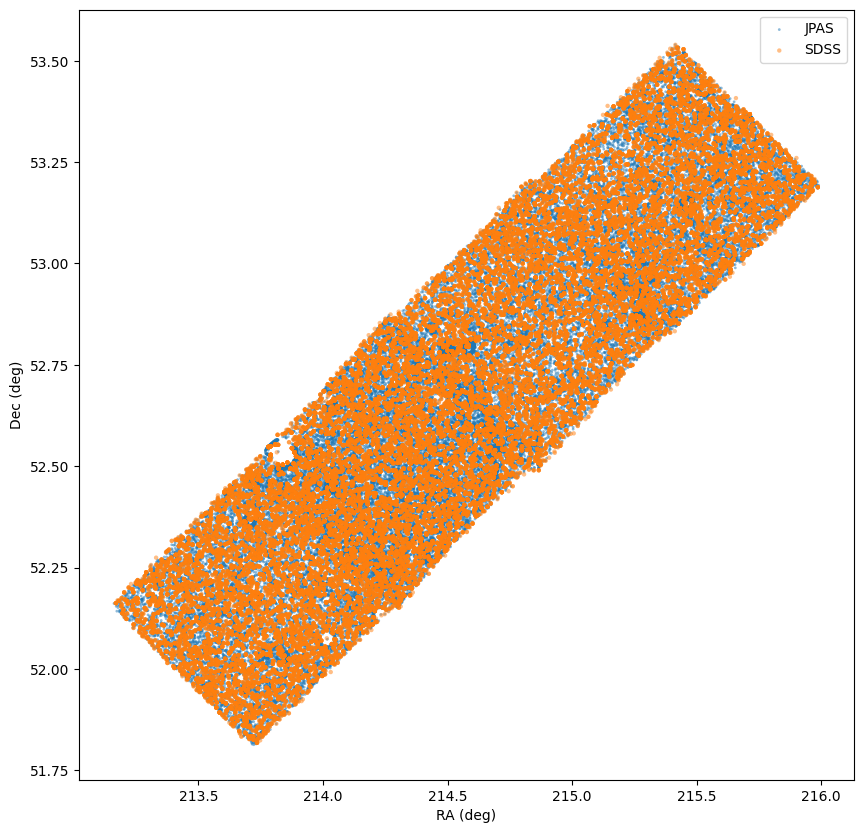

In [29]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_dual['ALPHA_J2000'], y=df_dual['DELTA_J2000'], s=4, 
            edgecolors='none', alpha=0.5, label='JPAS')
plt.scatter(x=df_sdss['ra'], y=df_sdss['dec'], s=10,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.legend()
plt.show()

In [30]:
df_sdss.reset_index(drop=True, inplace=True)
df_sdss

objid          ra        dec         u         g  \
0      1237661386531602598  214.881002  53.103171  21.01314  18.44333   
1      1237661386531602954  214.849506  53.116429  24.67554  22.26626   
2      1237661386531668421  215.063779  53.011360  21.86699  21.48073   
3      1237661386531733887  215.181673  52.928789  22.12696  22.32034   
4      1237661386531602453  214.909839  53.086063  16.56582  15.16612   
...                    ...         ...        ...       ...       ...   
64288  1237661416602665327  215.064293  52.811605  22.55150  21.68178   
64289  1237661416602534359  214.681031  53.037238  24.03888  22.65613   
64290  1237661416602665245  215.186484  52.737385  25.21909  21.39892   
64291  1237661416602665744  215.087082  52.796653  24.53555  23.26519   
64292  1237661416602665327  215.064293  52.811605  22.55150  21.68178   

              r         i         z  
0      17.18055  16.68684  16.43361  
1      20.84376  20.35080  20.02091  
2      20.64998  19.72184  19.44651  
3      21.86063  21.53305  20.56747  
4      15.85857  14.97295  14.29874  
...         ...       ...       ...  
64288  20.23207  19.54993  19.19487  
64289  21.39801  20.57948  20.18521  
64290  20.67319  20.46666  20.08990  
64291  21.56516  21.44293  21.29300  
64292  20.23207  19.54993  19.19487  

[64293 rows x 8 columns]

In [31]:
df_merged = pd.merge(df_dual, df_sdss, left_index=True, right_index=True)
df_merged

TILE_ID  NUMBER  ALPHA_J2000  DELTA_J2000    hpix11     X_IMAGE  \
0         2406       2   214.881557    53.103476  11700101  1756.88098   
1         2406       4   214.861588    53.115839  11700103  1483.69287   
2         2406       9   215.061658    52.998000  11699994  4155.54639   
3         2406      10   215.180854    52.927186  11699984  5755.89111   
4         2406      11   214.907509    53.089148  11700101  2092.67017   
...        ...     ...          ...          ...       ...         ...   
64288     2243   15940   215.064895    52.812546  11699797  6312.52832   
64289     2243   15941   214.688544    53.040802  11699934  1201.92981   
64290     2243   15942   215.186475    52.737363  11699447  7982.65723   
64291     2243   15943   215.084326    52.799349  11699797  6592.61572   
64292     2243   15944   215.068525    52.809148  11699797  6375.31055   

           Y_IMAGE     R_EFF  FWHM_WORLD   A_WORLD  ...  \
0        16.847881  4.717021    0.000920  0.000203  ...   
1        23.799297  2.087801    0.000216  0.000089  ...   
2        27.424644  2.750906    0.000281  0.000112  ...   
3        28.008156  3.174753    0.000259  0.000118  ...   
4        27.677053  6.961071    0.000425  0.000076  ...   
...            ...       ...         ...       ...  ...   
64288  5494.858400  5.580144    0.000434  0.000208  ...   
64289  5523.615230  5.165153    0.000383  0.000080  ...   
64290  5477.959470  2.420266    0.000250  0.000088  ...   
64291  5478.614750  2.749503    0.000376  0.000099  ...   
64292  5481.346680  2.557108    0.000504  0.000099  ...   

                                     FLUX_APER3_WORSTPSF  \
0      13.4787712 21.9287605 84.8950043 0.0 0.0 -15.4...   
1      13.8442249 -11.1433172 -7.49344969 0.0 0.0 32....   
2      48.0893555 -18.8876953 6.25967789 5.91546249 5...   
3      5.07513189 -2.2124567 -17.4072227 4.5401454 5....   
4      11.2324286 -5.72059345 -0.621722877 2.82598376...   
...                                                  ...   
64288  2.62564492 17.0725498 -0.419048488 9.98049927 ...   
64289  0.12868607 28.7272987 -0.522783279 6.50129843 ...   
64290  37.9531937 10.7759838 19.8581486 45.0965042 55...   
64291  25.4406128 27.8337746 8.4212904 17.8976784 30....   
64292  15.4436245 10.4397497 14.6387205 16.1626911 36...   

                              FLUX_RELERR_APER3_WORSTPSF                objid  \
0      2.492188 1.310547 0.12793 0.0 0.0 -1.056641 0....  1237661386531602598   
1      3.091797 -2.208984 -1.396484 0.0 0.0 1.017578 ...  1237661386531602954   
2      0.770996 -1.314453 1.626953 0.0 0.0 0.880859 0...  1237661386531668421   
3      6.058594 -11.148438 -1.080078 0.0 0.0 0.799316...  1237661386531733887   
4      3.712891 -5.078125 -18.03125 2.796875 0.0 0.81...  1237661386531602453   
...                                                  ...                  ...   
64288  6.867188 0.725586 -19.65625 1.023438 2.308594 ...  1237661416602665327   
64289  121.375 0.388916 -14.882812 1.603516 -1.378906...  1237661416602534359   
64290  0.383789 1.160156 0.351074 0.226807 0.255371 0...  1237661416602665245   
64291  0.600098 0.443604 0.825684 0.503906 0.455811 0...  1237661416602665744   
64292  1.051758 1.316406 0.459229 0.611328 0.370605 0...  1237661416602665327   

               ra        dec         u         g         r         i         z  
0      214.881002  53.103171  21.01314  18.44333  17.18055  16.68684  16.43361  
1      214.849506  53.116429  24.67554  22.26626  20.84376  20.35080  20.02091  
2      215.063779  53.011360  21.86699  21.48073  20.64998  19.72184  19.44651  
3      215.181673  52.928789  22.12696  22.32034  21.86063  21.53305  20.56747  
4      214.909839  53.086063  16.56582  15.16612  15.85857  14.97295  14.29874  
...           ...        ...       ...       ...       ...       ...       ...  
64288  215.064293  52.811605  22.55150  21.68178  20.23207  19.54993  19.19487  
64289  214.681031  53.037238  24.03888  22.65613  21.39801  20.5794

In [32]:
df_merged['sep2d'] = sep2d.to(u.arcsec).value
df_merged

TILE_ID  NUMBER  ALPHA_J2000  DELTA_J2000    hpix11     X_IMAGE  \
0         2406       2   214.881557    53.103476  11700101  1756.88098   
1         2406       4   214.861588    53.115839  11700103  1483.69287   
2         2406       9   215.061658    52.998000  11699994  4155.54639   
3         2406      10   215.180854    52.927186  11699984  5755.89111   
4         2406      11   214.907509    53.089148  11700101  2092.67017   
...        ...     ...          ...          ...       ...         ...   
64288     2243   15940   215.064895    52.812546  11699797  6312.52832   
64289     2243   15941   214.688544    53.040802  11699934  1201.92981   
64290     2243   15942   215.186475    52.737363  11699447  7982.65723   
64291     2243   15943   215.084326    52.799349  11699797  6592.61572   
64292     2243   15944   215.068525    52.809148  11699797  6375.31055   

           Y_IMAGE     R_EFF  FWHM_WORLD   A_WORLD  ...  \
0        16.847881  4.717021    0.000920  0.000203  ...   
1        23.799297  2.087801    0.000216  0.000089  ...   
2        27.424644  2.750906    0.000281  0.000112  ...   
3        28.008156  3.174753    0.000259  0.000118  ...   
4        27.677053  6.961071    0.000425  0.000076  ...   
...            ...       ...         ...       ...  ...   
64288  5494.858400  5.580144    0.000434  0.000208  ...   
64289  5523.615230  5.165153    0.000383  0.000080  ...   
64290  5477.959470  2.420266    0.000250  0.000088  ...   
64291  5478.614750  2.749503    0.000376  0.000099  ...   
64292  5481.346680  2.557108    0.000504  0.000099  ...   

                              FLUX_RELERR_APER3_WORSTPSF                objid  \
0      2.492188 1.310547 0.12793 0.0 0.0 -1.056641 0....  1237661386531602598   
1      3.091797 -2.208984 -1.396484 0.0 0.0 1.017578 ...  1237661386531602954   
2      0.770996 -1.314453 1.626953 0.0 0.0 0.880859 0...  1237661386531668421   
3      6.058594 -11.148438 -1.080078 0.0 0.0 0.799316...  1237661386531733887   
4      3.712891 -5.078125 -18.03125 2.796875 0.0 0.81...  1237661386531602453   
...                                                  ...                  ...   
64288  6.867188 0.725586 -19.65625 1.023438 2.308594 ...  1237661416602665327   
64289  121.375 0.388916 -14.882812 1.603516 -1.378906...  1237661416602534359   
64290  0.383789 1.160156 0.351074 0.226807 0.255371 0...  1237661416602665245   
64291  0.600098 0.443604 0.825684 0.503906 0.455811 0...  1237661416602665744   
64292  1.051758 1.316406 0.459229 0.611328 0.370605 0...  1237661416602665327   

               ra        dec         u         g         r         i  \
0      214.881002  53.103171  21.01314  18.44333  17.18055  16.68684   
1      214.849506  53.116429  24.67554  22.26626  20.84376  20.35080   
2      215.063779  53.011360  21.86699  21.48073  20.64998  19.72184   
3      215.181673  52.928789  22.12696  22.32034  21.86063  21.53305   
4      214.909839  53.086063  16.56582  15.16612  15.85857  14.97295   
...           ...        ...       ...       ...       ...       ...   
64288  215.064293  52.811605  22.55150  21.68178  20.23207  19.54993   
64289  214.681031  53.037238  24.03888  22.65613  21.39801  20.57948   
64290  215.186484  52.737385  25.21909  21.39892  20.67319  20.46666   
64291  215.087082  52.796653  24.53555  23.26519  21.56516  21.44293   
64292  215.064293  52.811605  22.55150  21.68178  20.23207  19.54993   

              z      sep2d  
0      16.43361   1.626131  
1      20.02091  26.193464  
2      19.44651  48.315263  
3      20.56747   6.037022  
4      14.29874  12.192949  
...         ...        ...  
64288  19.19487   3.629792  
64289  20.18521  20.715230  
64290  20.08990   0.082547  
64291  21.29300  11.410369  
64292  19.19487  12.767905  

[64293 rows x 61 columns]

<Axes: >

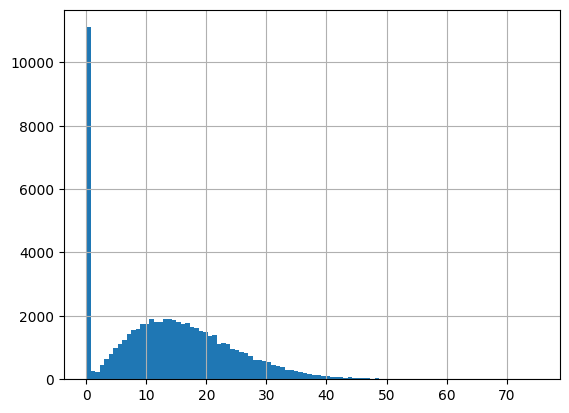

In [33]:
df_merged['sep2d'].hist(bins=100)

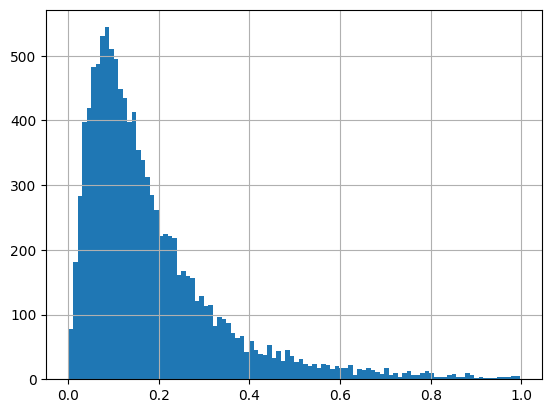

In [34]:
cond = df_merged['sep2d'] < 1
df_merged.loc[cond, 'sep2d'].hist(bins=100)
plt.show()

In [35]:
df_merged[cond]
df_merged_clean = df_merged[cond].reset_index(drop=True)
df_merged_clean

TILE_ID  NUMBER  ALPHA_J2000  DELTA_J2000    hpix11      X_IMAGE  \
0         2406      63   215.299481    52.858350  11699634  7331.616210   
1         2406      87   214.822503    53.142780  11700109   918.669495   
2         2406      98   215.241311    52.895117  11699642  6525.163570   
3         2406     101   215.170266    52.937836  11699984  5565.076660   
4         2406     128   214.921135    53.086425  11700026  2215.661130   
...        ...     ...          ...          ...       ...          ...   
11235     2243   15917   214.856402    52.938461  11699837  3485.648190   
11236     2243   15922   214.952131    52.879557  11699807  4795.316410   
11237     2243   15926   214.954927    52.875813  11699807  4856.262700   
11238     2243   15927   214.955685    52.876984  11699807  4848.283690   
11239     2243   15942   215.186475    52.737363  11699447  7982.657230   

           Y_IMAGE     R_EFF  FWHM_WORLD   A_WORLD  ...  \
0        50.990948  4.107177    0.000737  0.000150  ...   
1        68.806786  3.803615    0.000906  0.000155  ...   
2        73.187111  6.074473    0.000757  0.000226  ...   
3        76.971313  2.325948    0.000249  0.000085  ...   
4        87.757546  2.521249    0.000265  0.000091  ...   
...            ...       ...         ...       ...  ...   
11235  5499.791990  2.414071    0.000241  0.000087  ...   
11236  5483.736820  4.595197    0.000685  0.000178  ...   
11237  5460.550290  3.182620    0.000358  0.000123  ...   
11238  5478.852050  9.086297    0.001840  0.000352  ...   
11239  5477.959470  2.420266    0.000250  0.000088  ...   

                              FLUX_RELERR_APER3_WORSTPSF                objid  \
0      0.79541 1.006836 0.470459 0.956055 -0.774414 0...  1237661416602665809   
1      0.881348 0.477539 0.266602 -3.580078 -2.664062...  1237661386531603339   
2      0.531738 2.023438 0.527344 1.371094 23.84375 -...  1237661416602665513   
3      -3.220703 -32.53125 -4.730469 0.713867 -2.6738...  1237661386531668687   
4      0.339111 0.755859 0.265137 0.41626 0.317139 0....  1237661386531603112   
...                                                  ...                  ...   
11235  0.382324 0.314209 0.258301 0.289551 0.172974 0...  1237661416602599597   
11236  0.511719 0.358398 0.154907 0.303711 0.330078 0...  1237661416602599935   
11237  2.527344 -3.603516 0.326172 6.40625 0.858398 0...  1237661416602599941   
11238  0.378418 0.445312 0.130249 0.170654 0.279541 0...  1237661416602599942   
11239  0.383789 1.160156 0.351074 0.226807 0.255371 0...  1237661416602665245   

               ra        dec         u         g         r         i  \
0      215.299508  52.858380  23.43516  22.78599  21.52763  21.01237   
1      214.822378  53.142751  22.40159  22.83390  21.70929  21.13686   
2      215.241304  52.895094  21.64734  21.60335  21.41278  21.11497   
3      215.170294  52.937850  26.54866  23.80386  21.76141  21.15046   
4      214.921165  53.086405  24.47125  21.39535  20.66472  20.44483   
...           ...        ...       ...       ...       ...       ...   
11235  214.856460  52.938434  22.66224  20.87946  19.55962  18.88937   
11236  214.952083  52.879582  22.47015  21.41853  21.11974  20.69354   
11237  214.954945  52.875808  23.33652  22.74374  21.11961  20.40122   
11238  214.955812  52.877082  22.20835  21.24517  20.25896  19.76419   
11239  215.186484  52.737385  25.21909  21.39892  20.67319  20.46666   

              z     sep2d  
0      19.96541  0.120617  
1      20.88151  0.288872  
2      21.81807  0.085378  
3      21.02158  0.078345  
4      20.19188  0.098211  
...         ...       ...  
11235  18.53219  0.157893  
11236  20.94693  0.138666  
11237  20.15208  0.043179  
11238  19.73869  0.448080  
11239  20.08990  0.082547  

[11240 rows x 61 columns]

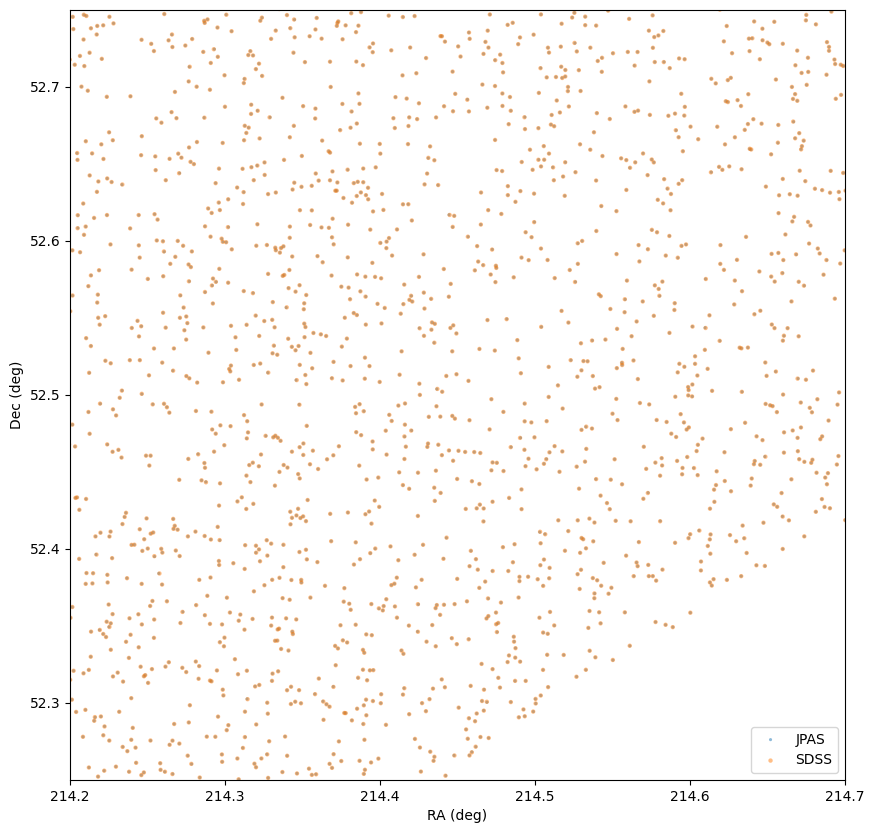

In [36]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_merged_clean['ALPHA_J2000'], y=df_merged_clean['DELTA_J2000'], s=5, 
            edgecolors='none', alpha=0.5, label='JPAS')
plt.scatter(x=df_merged_clean['ra'], y=df_merged_clean['dec'], s=10,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.xlim(214.2, 214.7)
plt.ylim(52.25, 52.75)
plt.legend()
plt.show()

## Flux analysis

Task:
Take JPAS band fluxes at 6000A and the SDSS r band magnitude
build a plot of the JPAS flux 6000A vs the SDSS r band magnitude
mag = -2.5 * log10(flux) 

In [13]:
df_merged_clean = pd.read_csv('./data/merged.csv')
df_merged_clean

sdss_index  ALPHA_J2000  DELTA_J2000  \
0              21   215.090667    52.982004   
1              23   214.818958    53.142572   
2              23   214.818958    53.142572   
3              23   214.818958    53.142572   
4              27   215.253602    52.885193   
...           ...          ...          ...   
11235       34959   213.546095    52.179947   
11236       34960   213.713405    52.078258   
11237       34975   214.456853    52.602606   
11238       34976   214.360715    52.661496   
11239       34978   213.439264    52.245127   

                                               FLUX_AUTO  \
0      22.2053738 22.7434101 26.3489399 84.1416092 91...   
1      104.617638 -5.73831844 34.9594536 10.0378342 5...   
2      104.617638 -5.73831844 34.9594536 10.0378342 5...   
3      104.617638 -5.73831844 34.9594536 10.0378342 5...   
4      -18.9757614 6.38343811 2.07227039 89.8853378 6...   
...                                                  ...   
11235  5.00354528 -25.0767365 5.09040546 -5.33011341 ...   
11236  4.01132441 54.4925003 14.1496754 25.9785976 60...   
11237  94.815712 93.7224884 97.3756943 98.3139496 179...   
11238  -12.626689 23.734478 0.221429378 -3.08306146 -...   
11239  14.1180916 51.8038254 -6.97361469 22.4660225 -...   

                                        FLUX_RELERR_AUTO  CLASS_STAR  TILE_ID  \
0      1.671875 1.47168 0.598145 0.400635 1.112305 0....       0.540     2406   
1      0.292236 -2.544922 0.293457 2.289062 2.175781 ...       0.027     2406   
2      0.292236 -2.544922 0.293457 2.289062 2.175781 ...       0.027     2406   
3      0.292236 -2.544922 0.293457 2.289062 2.175781 ...       0.027     2406   
4      -0.73877 4.683594 11.6875 0.336426 0.0 0.86425...       0.652     2406   
...                                                  ...         ...      ...   
11235  2.466797 -0.479736 1.746094 -1.021484 3.367188...       0.032     2470   
11236  3.652344 0.526855 0.713379 0.507812 0.424561 0...       0.331     2470   
11237  0.322021 0.523438 0.163696 0.241821 0.230957 0...       0.000     2241   
11238  -0.481445 0.893066 30.4375 -1.539062 -0.351074...       0.002     2241   
11239  1.228516 0.685059 -0.855469 0.739746 -0.923828...       0.473     2470   

                     objid          ra        dec         u         g  \
0      1237659120933077309  214.148695  52.397772  22.43197  21.29812   
1      1237659120933077458  214.150613  52.251383  22.21315  21.47941   
2      1237659120933077458  214.150613  52.251383  22.21315  21.47941   
3      1237659120933077458  214.150613  52.251383  22.21315  21.47941   
4      1237659120933077509  214.150861  52.220137  26.00127  22.70438   
...                    ...         ...        ...       ...       ...   
11235  1237661417139667316  215.888460  53.140484  25.93274  22.02895   
11236  1237661417139667329  215.889541  53.134332  23.20494  21.39593   
11237  1237661417139601866  215.646435  53.094276  24.54577  22.84830   
11238  1237661417139601850  215.627142  53.081659  22.64567  22.38203   
11239  1237661417139536785  215.466450  53.244510  21.51586  21.15982   

              r         i         z   run  camcol  field  specObjID     sep2d  
0      20.77433  20.47875  20.02771  3177       6     61          0  0.120617  
1      21.05846  21.04335  21.32086  3177       6     61          0  0.288872  
2      21.05846  21.04335  21.32086  3177       6     61          0  0.085378  
3      21.05846  21.04335  21.32086  3177       6     61          0  0.078345  
4      21.92644  22.01675  20.91559  3177       6     61          0  0.098211  
...         ...       ...       ...   ...     ...    ...        ...       ...  
11235  21.15060  20.75179  20.27895  3712       3    209          0  0.157893  
11236  19.73843  19.08632  18.70387  3712       3    209          0  0.138666  
11237  20.99624  20.11850  19.59448  3712       3    208          0  0.043179  
11238  21.32424  23.87182  23.40334  3712       3    208          0  0.

In [20]:
for idx,rows in df_merged_clean.groupby('sdss_index'):
    if len(rows) > 1:
        print(idx)
        print(rows)
        break

23

sdss_index  ALPHA_J2000  DELTA_J2000  \
1          23   214.818958    53.142572   
2          23   214.818958    53.142572   
3          23   214.818958    53.142572   

                                           FLUX_AUTO  \
1  104.617638 -5.73831844 34.9594536 10.0378342 5...   
2  104.617638 -5.73831844 34.9594536 10.0378342 5...   
3  104.617638 -5.73831844 34.9594536 10.0378342 5...   

                                    FLUX_RELERR_AUTO  CLASS_STAR  TILE_ID  \
1  0.292236 -2.544922 0.293457 2.289062 2.175781 ...       0.027     2406   
2  0.292236 -2.544922 0.293457 2.289062 2.175781 ...       0.027     2406   
3  0.292236 -2.544922 0.293457 2.289062 2.175781 ...       0.027     2406   

                 objid          ra        dec         u         g         r  \
1  1237659120933077458  214.150613  52.251383  22.21315  21.47941  21.05846   
2  1237659120933077458  214.150613  52.251383  22.21315  21.47941  21.05846   
3  1237659120933077458  214.150613  52.251383  22.21315  21.47941  21.05846   

          i         z   run  camcol  field  specObjID     sep2d  
1  21.04335  21.32086  3177       6     61          0  0.288872  
2  21.04335  21.32086  3177       6     61          0  0.085378  
3  21.04335  21.32086  3177       6     61          0  0.078345

In [7]:
def to_array(x):
    return np.array([float(i) for i in x.split()])

df_flux = df_merged_clean['FLUX_AUTO']
df_filter = pd.read_csv('./data/611913.csv', comment='#')
df_wavelength = df_filter['wavelength']
df_flux = df_flux.str.split(' ', expand=True).astype(float)
df_flux.columns = [df_filter['wavelength'][i] for i in df_flux.columns]
df_flux

3497       3782       3904       3996        4110        4203  \
0       22.205374  22.743410  26.348940  84.141609   91.130730   64.006706   
1      104.617638  -5.738318  34.959454  10.037834   51.161438  -39.525509   
2      104.617638  -5.738318  34.959454  10.037834   51.161438  -39.525509   
3      104.617638  -5.738318  34.959454  10.037834   51.161438  -39.525509   
4      -18.975761   6.383438   2.072270  89.885338    6.490404   56.315437   
...           ...        ...        ...        ...         ...         ...   
11235    5.003545 -25.076736   5.090405  -5.330113    6.809536    8.333562   
11236    4.011324  54.492500  14.149675  25.978598   60.415356   60.238434   
11237   94.815712  93.722488  97.375694  98.313950  179.511612  120.838692   
11238  -12.626689  23.734478   0.221429  -3.083061  -22.815414   12.776225   
11239   14.118092  51.803825  -6.973615  22.466023  -15.974187   37.335983   

            4303       4403        4503        4603  ...       8716  \
0       8.801331  51.780243   96.481339   15.318735  ...  10.356154   
1       4.471567  15.832583   47.289925   32.879097  ...   1.239885   
2       4.471567  15.832583   47.289925   32.879097  ...   1.239885   
3       4.471567  15.832583   47.289925   32.879097  ...   1.239885   
4       7.714910  10.208540   42.960339   22.755262  ...   7.656235   
...          ...        ...         ...         ...  ...        ...   
11235  22.638620  10.565983   44.770737    1.184354  ...  15.484350   
11236  13.109083   8.928559   12.057054    1.086197  ...  -2.002237   
11237  87.901413  57.730602  170.254517  110.514160  ...  91.932419   
11238  11.395013 -11.939105   37.567787   -3.422027  ...   3.027629   
11239  17.570852   3.427007   -7.980015    9.237435  ...   8.562594   

            8810        8912        9000        9107        9316        3623  \
0      10.196817  128.204712   -7.777247   18.525196    6.769637   21.272047   
1       3.569068   45.743008  -13.290321    8.481985    3.019038   35.992931   
2       3.569068   45.743008  -13.290321    8.481985    3.019038   35.992931   
3       3.569068   45.743008  -13.290321    8.481985    3.019038   35.992931   
4       6.503764  106.240204   -2.096335   16.238701    2.819695    4.242908   
...          ...         ...         ...         ...         ...         ...   
11235  24.048946    7.039456   -0.345069    5.071452   18.188724  -18.557892   
11236  -1.717485  -16.718149   -7.704454    4.123103   -0.795694    3.247441   
11237  64.013214   86.154869  105.929558  140.868256  110.661224  138.438553   
11238   5.354877  -19.734117    9.307060   17.677919   15.099763    6.048913   
11239   0.338961   -1.708053  -13.664415   -6.520300   -3.460444   17.254229   

             4750        6250        7725  
0       50.692875   41.947025   29.410643  
1       20.051699   13.080560   11.855315  
2       20.051699   13.080560   11.855315  
3       20.051699   13.080560   11.855315  
4       39.661240   25.864260   16.538427  
...           ...         ...         ...  
11235    7.219059   12.366175   16.021702  
11236    6.946670    9.650591    4.749315  
11237  114.452370  121.418594  102.260376  
11238    7.527133    6.332057    3.533300  
11239    6.859945    9.108467    5.539762  

[11240 rows x 60 columns]

/tmp/ipykernel_46342/3369002902.py:5: RuntimeWarning: invalid value encountered in log10
  r_mags['r_jpas'] = r_mags['r_jpas'].apply(lambda row : -2.5 * np.log10(row * pow(10, -19)))


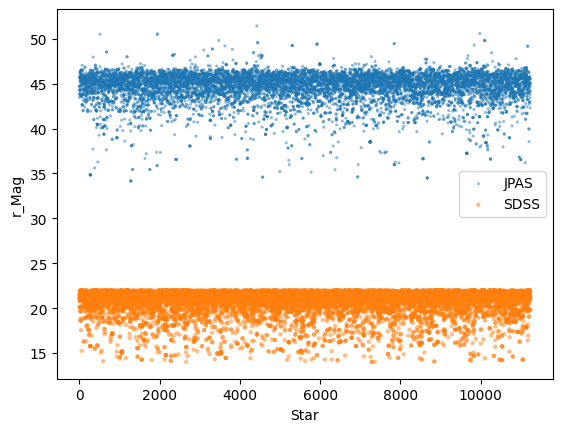

In [9]:

rSDSS_ID = 58 
df_filter.loc[rSDSS_ID]
r_mags = pd.DataFrame({'r_jpas': df_flux[df_filter.loc[rSDSS_ID]['wavelength']],
                       'r_sdss': df_merged_clean['r']})
r_mags['r_jpas'] = r_mags['r_jpas'].apply(lambda row : -2.5 * np.log10(row * pow(10, -19)))
# figure1 = plt.figure(figsize=(10, 10))
plt.scatter(x=r_mags.index, y=r_mags['r_jpas'], s=5, 
            edgecolors='none', alpha=0.5, label='JPAS')
plt.scatter(x=r_mags.index, y=r_mags['r_sdss'], s=10,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('Star')
plt.ylabel('r_Mag')
plt.legend()
plt.show()


/tmp/ipykernel_46342/3140652392.py:4: RuntimeWarning: invalid value encountered in log10
  r_mags['r_jpas'] = r_mags['r_jpas'].apply(lambda row : -2.5 * np.log10(row * pow(10, -19)))


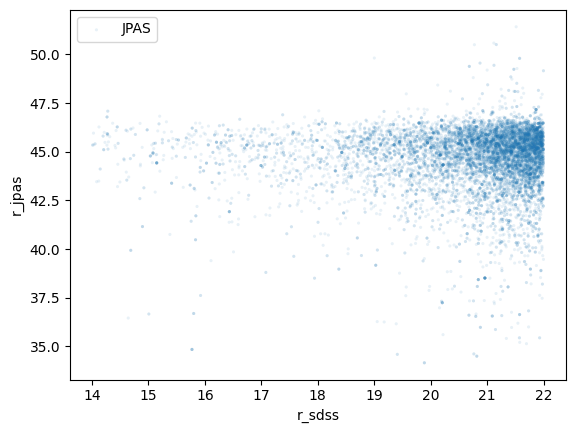

In [11]:
df_filter.loc[rSDSS_ID]
r_mags = pd.DataFrame({'r_jpas': df_flux[df_filter.loc[rSDSS_ID]['wavelength']],
                       'r_sdss': df_merged_clean['r']})
r_mags['r_jpas'] = r_mags['r_jpas'].apply(lambda row : -2.5 * np.log10(row * pow(10, -19)))
# figure1 = plt.figure(figsize=(10, 10))
plt.scatter(x=r_mags['r_sdss'], y=r_mags['r_jpas'], s=5, 
            edgecolors='none', alpha=0.1, label='JPAS')
# plt.scatter(x=r_mags.index, y=r_mags['r_sdss'], s=10,
#              edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('r_sdss')
plt.ylabel('r_jpas')
plt.legend()
plt.show()

C:\Users\kovai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kovai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


11240


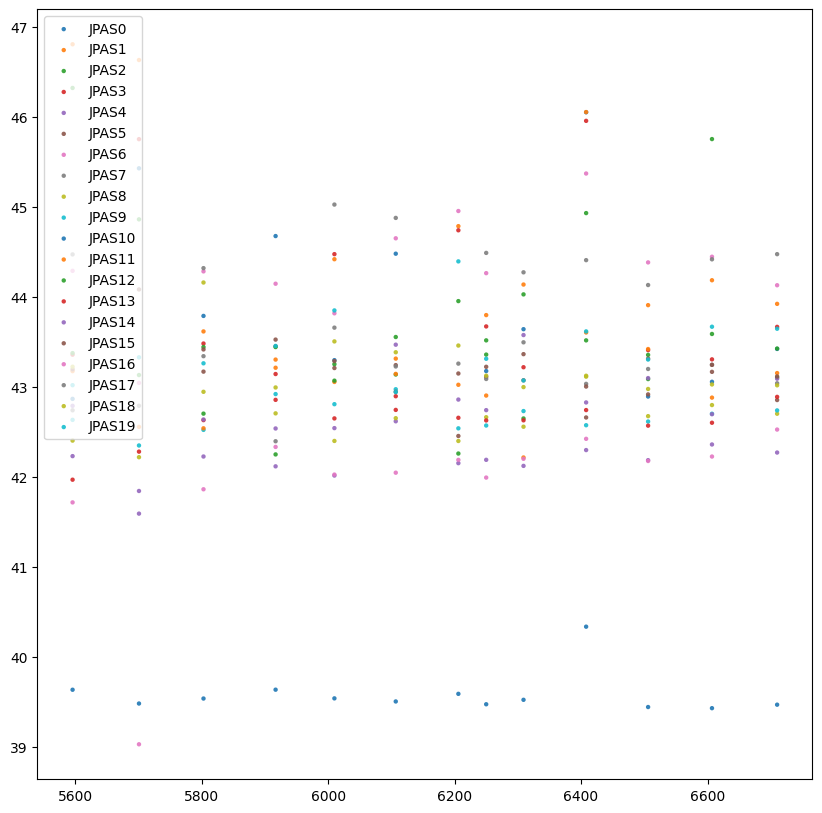

In [144]:

df_R_filter = df_filter.drop(df_filter[df_filter['wavelength'] < 5500].index)
df_R_filter.drop(df_R_filter[df_R_filter['wavelength'] > 6800].index, inplace=True)

df_rmag_jpas = df_flux[df_R_filter['wavelength']].apply(lambda row : -2.5 * np.log10(row * pow(10, -19)))

print(len(df_rmag_jpas))
figure1 = plt.figure(figsize=(10, 10))
for i in range (20) :
    plt.scatter(x=df_rmag_jpas.iloc[0].index, y=df_rmag_jpas.iloc[i], s=10, 
                edgecolors='none', alpha=0.9, label='JPAS' + str(i))
plt.legend()
plt.show()